t-statistic: -5.0556158403339255
p-value: 2.884171214210812e-06
Reject the null hypothesis. There is enough evidence to suggest that students with a GPA <= 7 have lower placement TESTSCORES than those with a GPA > 7.


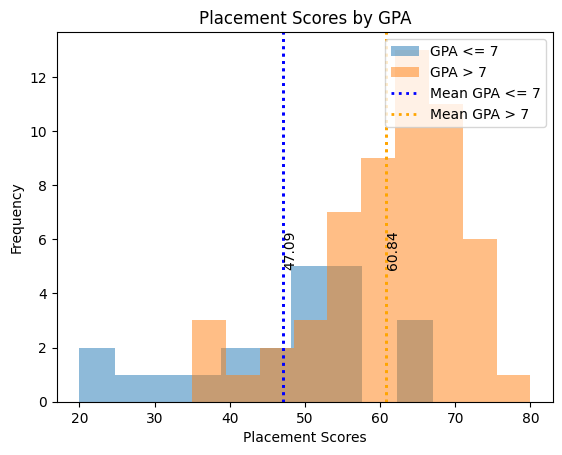

In [14]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

#reading in the data
df = pd.read_csv('gpa_placementScores.csv')

# conducting two-sample t-test for hypothesis "Students with a GPA <= 7 have lower mean placement TESTSCORES than those with a GPA > 7."

#spliting the data into two groups
group1 = df[df['GPA'] <= 7]
group2 = df[df['GPA'] > 7]

#conduct the t-test
t_stat, p_val = stats.ttest_ind(group1['Placement_Score'], group2['Placement_Score'])

print('t-statistic:', t_stat)
print('p-value:', p_val)



#interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that students with a GPA <= 7 have lower placement TESTSCORES than those with a GPA > 7.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that students with a GPA <= 7 have lower placement TESTSCORES than those with a GPA > 7.")

# visualing the data


plt.hist(group1['Placement_Score'], alpha=0.5, label='GPA <= 7')
plt.hist(group2['Placement_Score'], alpha=0.5, label='GPA > 7')
# plot mean test scores of each group with dotted lines 
plt.axvline(group1['Placement_Score'].mean(), color='b', linestyle='dotted', linewidth=2)
plt.axvline(group2['Placement_Score'].mean(), color='orange', linestyle='dotted', linewidth=2)
# add legend
plt.xlabel('Placement Scores')
plt.ylabel('Frequency')
plt.title('Placement Scores by GPA')
# mark the mean test scores of each group
plt.axvline(group1['Placement_Score'].mean(), color='b', linestyle='dotted', linewidth=2, label='Mean GPA <= 7')
plt.axvline(group2['Placement_Score'].mean(), color='orange', linestyle='dotted', linewidth=2, label='Mean GPA > 7')

# write the value of the mean test scores of each group
plt.text(group1['Placement_Score'].mean(), 5, round(group1['Placement_Score'].mean(), 2), rotation=90, color='black')
plt.text(group2['Placement_Score'].mean(), 5, round(group2['Placement_Score'].mean(), 2), rotation=90, color='black')



plt.legend(loc='upper right')
plt.show()





In [16]:
# Perform Mann-Whitney U test
statistic, p_value_mannwhitney = stats.mannwhitneyu(group1['Placement_Score'], group2['Placement_Score'], alternative='less') # 'less' indicates a one-sided test where we're interested in whether group1 has lower values

print('Mann-Whitney U statistic:', statistic)
print('Mann-Whitney U p-value:', p_value_mannwhitney)

# Interpret the results
alpha = 0.05
if p_value_mannwhitney < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that students with a GPA <= 7 have lower placement scores than those with a GPA > 7.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that students with a GPA <= 7 have lower placement scores than those with a GPA > 7.")

Mann-Whitney U statistic: 240.5
Mann-Whitney U p-value: 1.5422147033973246e-05
Reject the null hypothesis. There is enough evidence to suggest that students with a GPA <= 7 have lower placement scores than those with a GPA > 7.
